In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wine.csv')

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


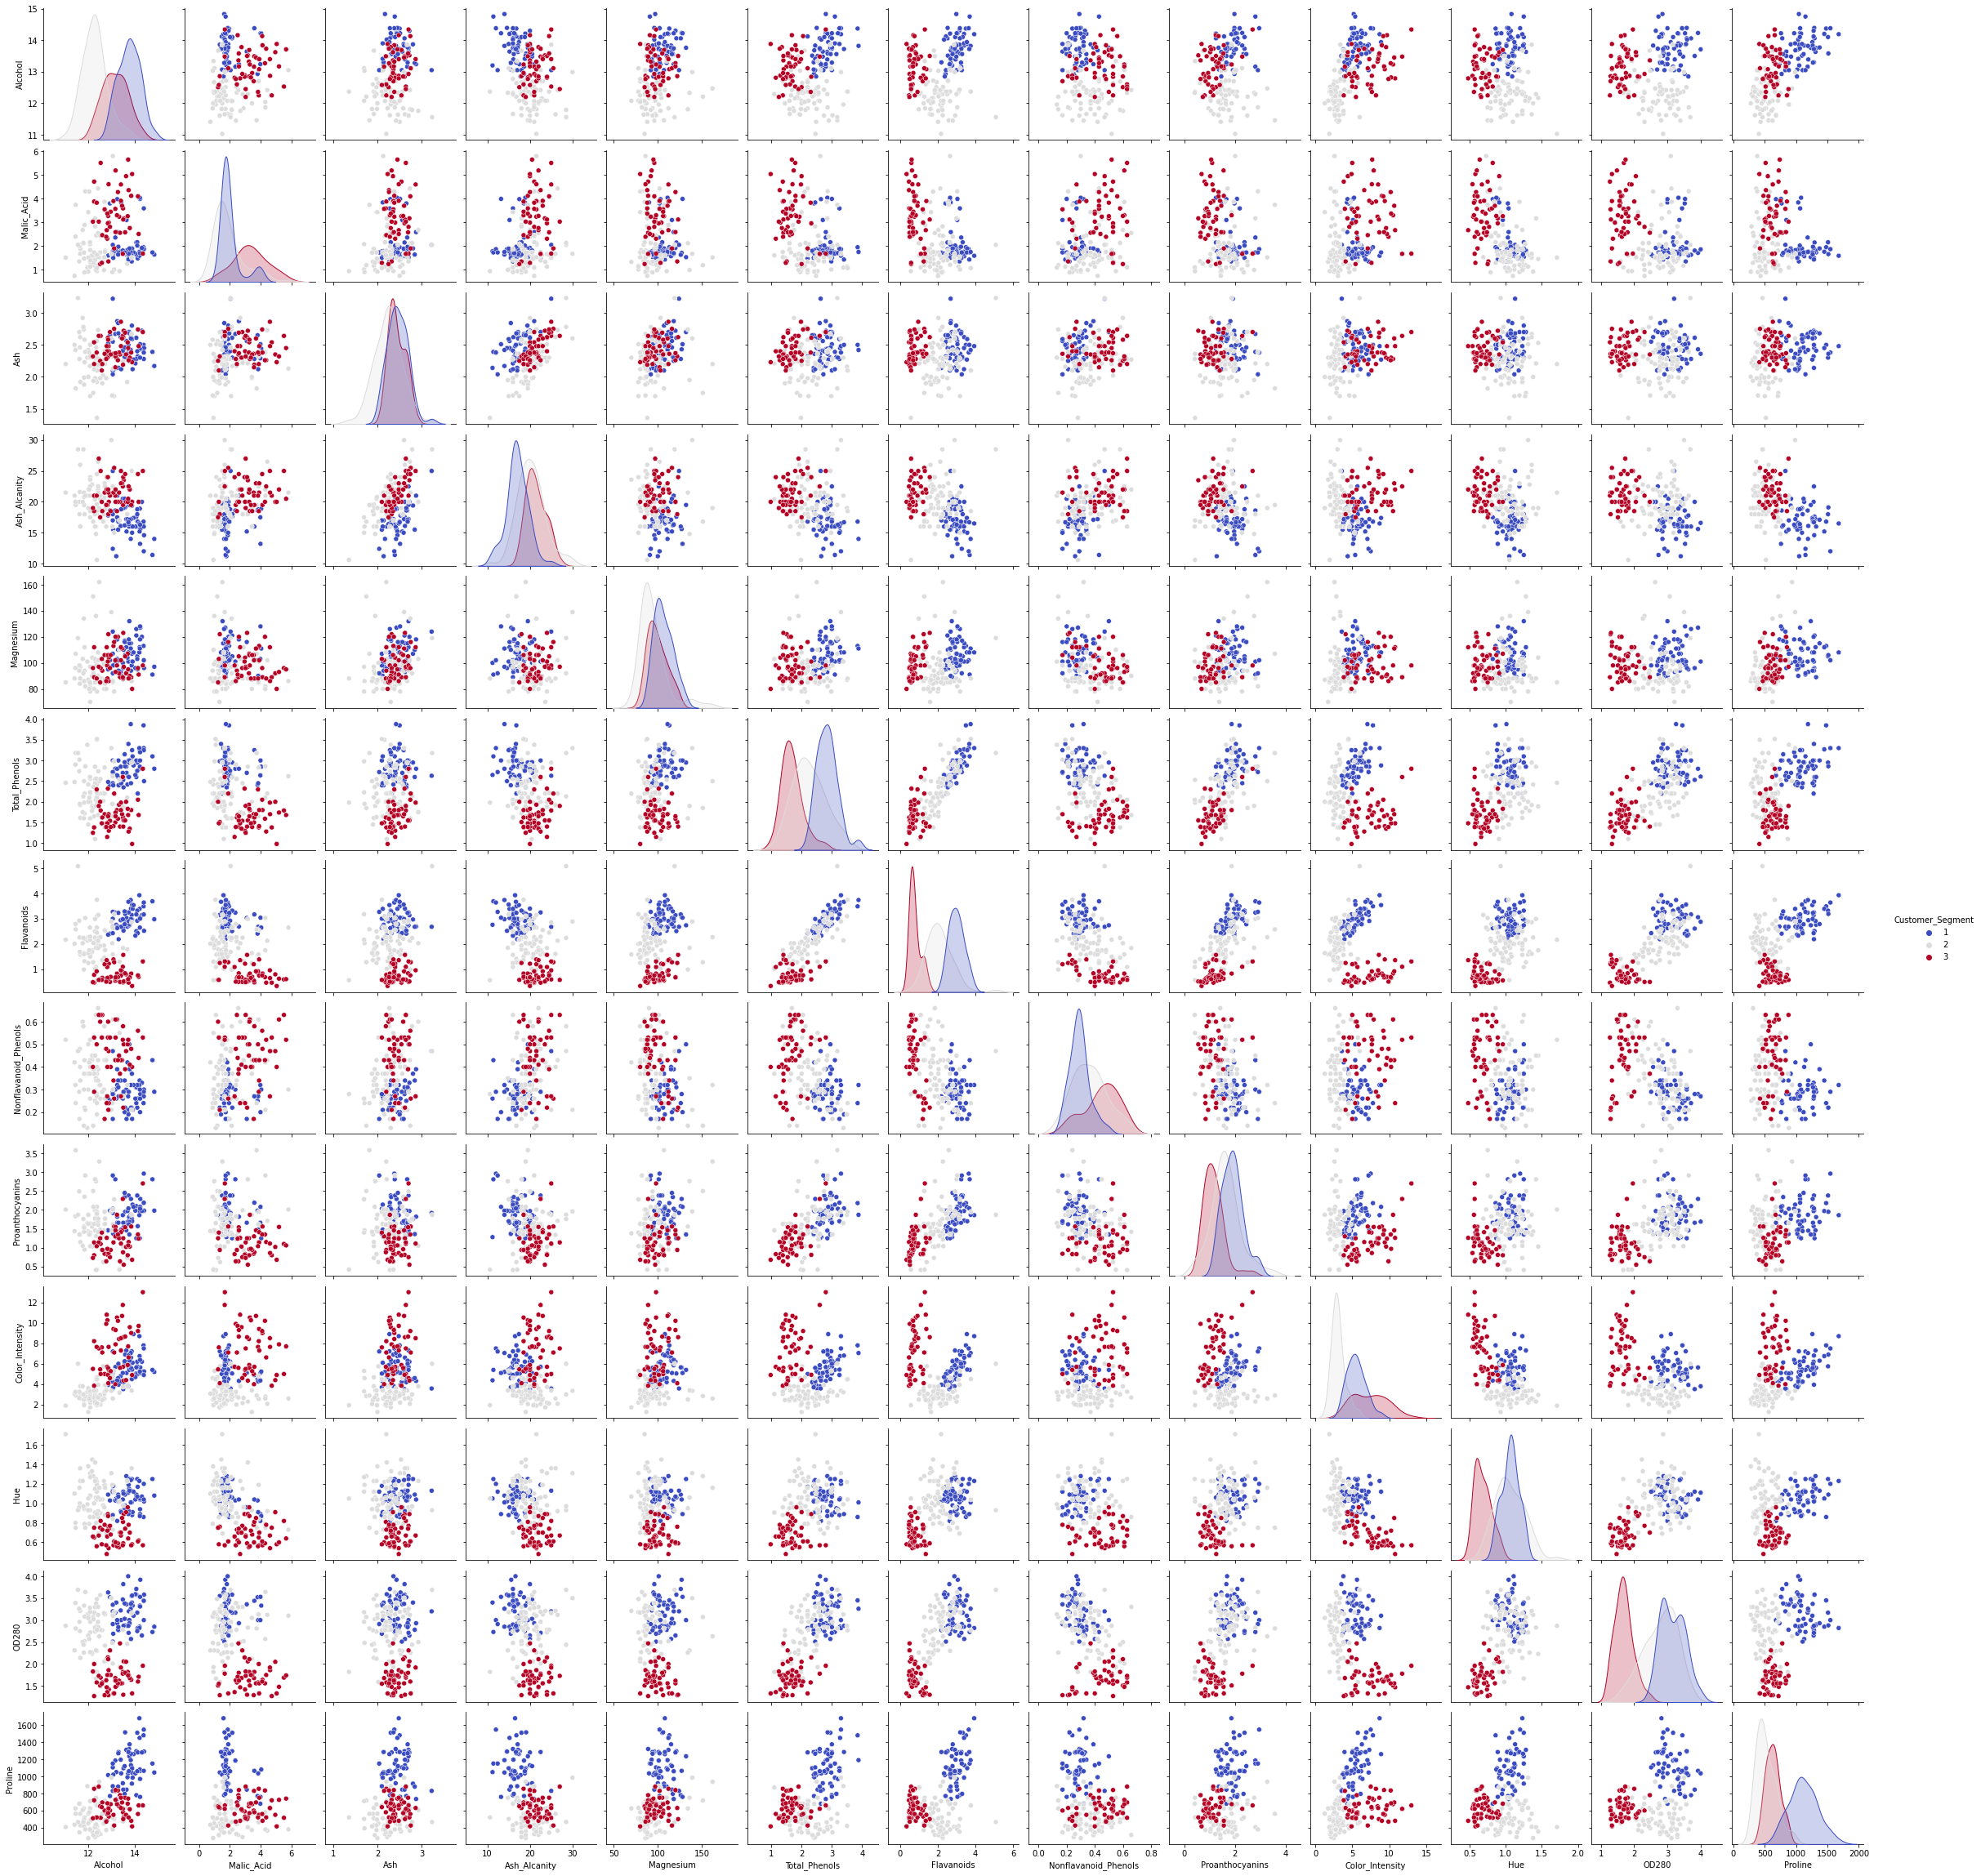

In [6]:
sns.pairplot(df,hue='Customer_Segment',palette='coolwarm');

In [7]:
x=df.drop('Customer_Segment',axis=1)

In [8]:
y=df['Customer_Segment']

In [9]:
x.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
x.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [11]:
y.isna().sum()

0

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler=MinMaxScaler()

In [18]:
x_train=scaler.fit_transform(x_train)

In [19]:
x_test=scaler.transform(x_test)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn=KNeighborsClassifier(n_neighbors=5)

In [42]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
knn.score(x_test,y_test)

0.9629629629629629

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
y_pred=knn.predict(x_test)

In [46]:
confusion=confusion_matrix(y_test,y_pred)

In [47]:
confusion

array([[18,  0,  0],
       [ 0, 19,  2],
       [ 0,  0, 15]], dtype=int64)

In [48]:
classify=classification_report(y_test,y_pred)

In [49]:
classify

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        18\n           2       1.00      0.90      0.95        21\n           3       0.88      1.00      0.94        15\n\n    accuracy                           0.96        54\n   macro avg       0.96      0.97      0.96        54\nweighted avg       0.97      0.96      0.96        54\n'